# Car Purchase Amount Prediction
You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes:

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary
- Credit Card Debt
- Net Worth

The model should predict:
Car Purchase Amount

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_name = "Car_Purchasing_Data.csv"
Y_LABEL = "Car Purchase Amount"



# Load and clean Data

In [3]:
df = pd.read_csv(file_name, encoding = 'ISO-8859-1')
print(df.keys())

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [6]:
df = df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)

In [7]:
df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# Explore Data

In [8]:
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [10]:
Y = df[Y_LABEL]

X = df.drop(Y_LABEL, axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            500 non-null    int64  
 1   Age               500 non-null    float64
 2   Annual Salary     500 non-null    float64
 3   Credit Card Debt  500 non-null    float64
 4   Net Worth         500 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


In [12]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.241674,7.978862,20.0,40.949969,46.049901,51.612263,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0


In [13]:
FEATURE_LABELS = list(X.keys())

In [22]:
Y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

## Explore Correlation

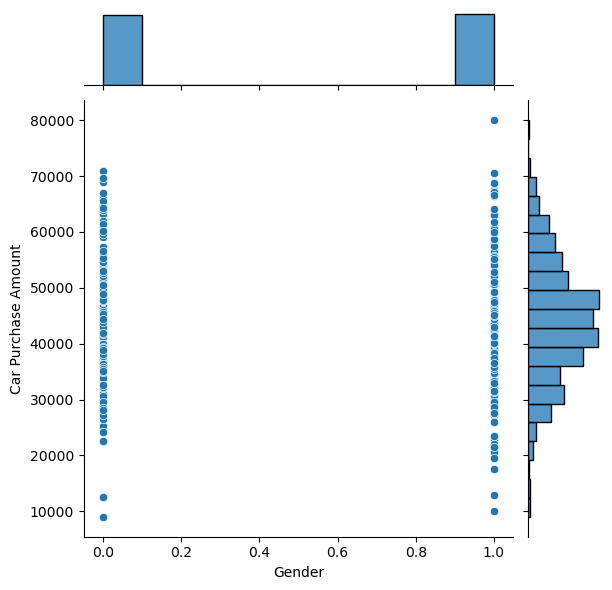

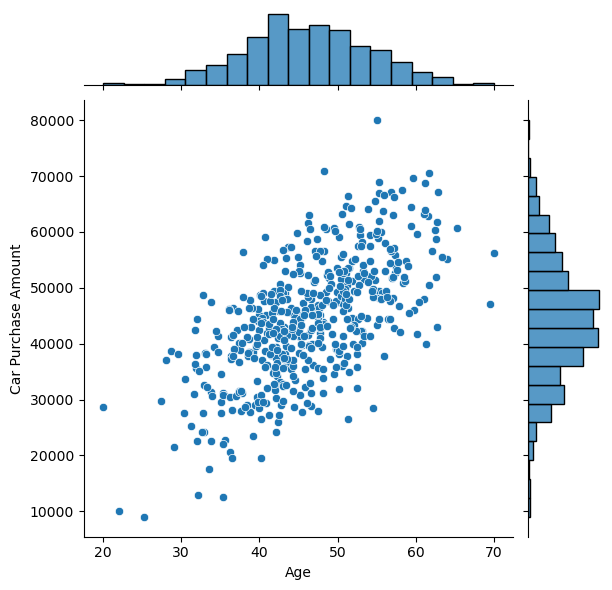

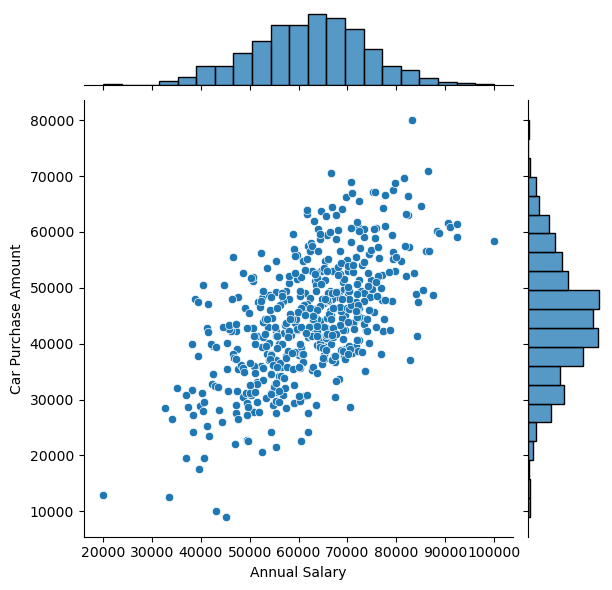

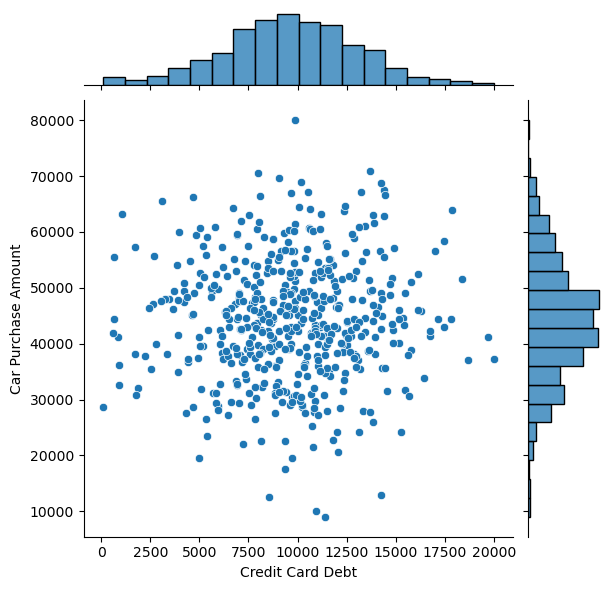

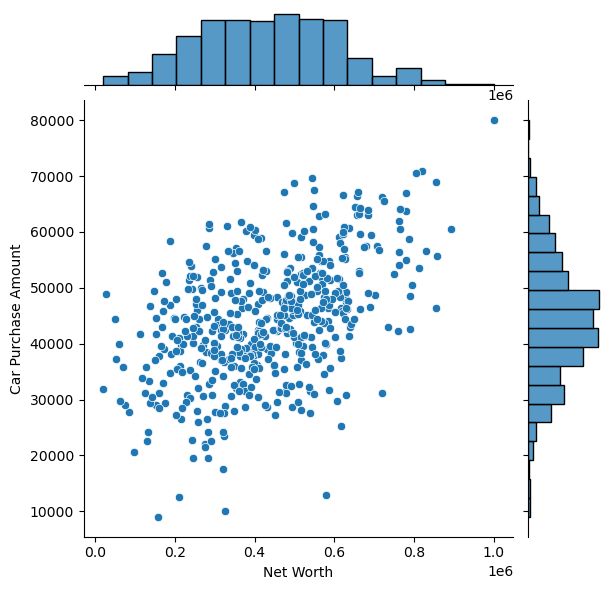

In [14]:
def plot_joint_plot( X_label, Y_label, data):
    sns.jointplot(x=X_label, y=Y_label, data=data)
    
for feature_label in FEATURE_LABELS:
    plot_joint_plot(feature_label, Y_LABEL, data=df)

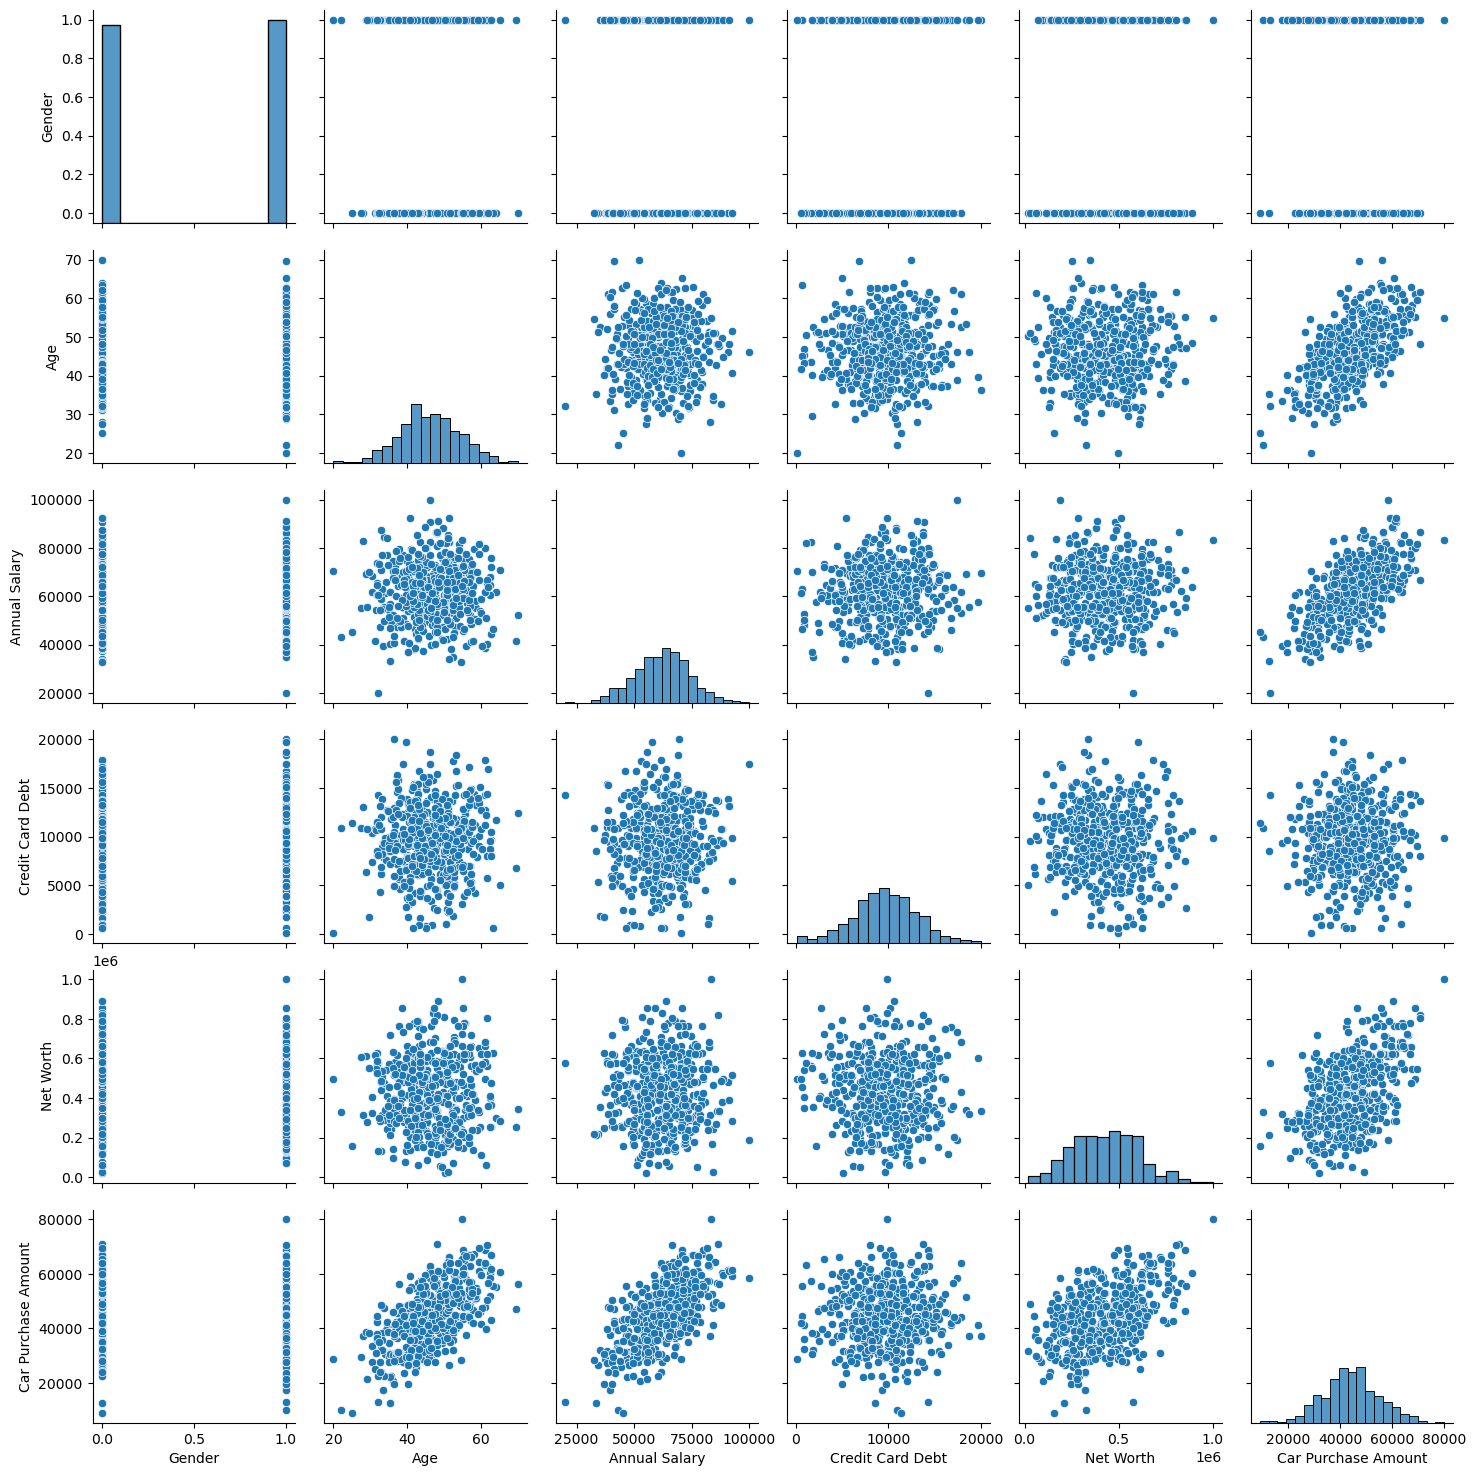

In [15]:
sns.pairplot(df)

<AxesSubplot:>

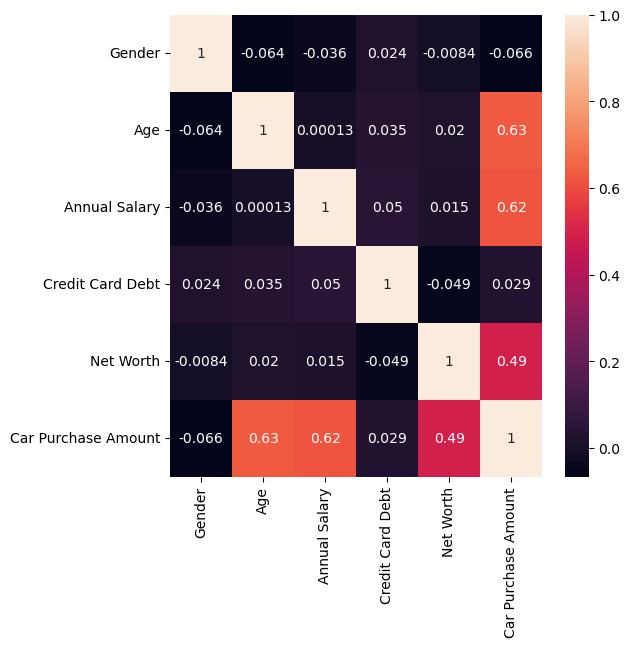

In [16]:
plt.figure(figsize = (6, 6))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

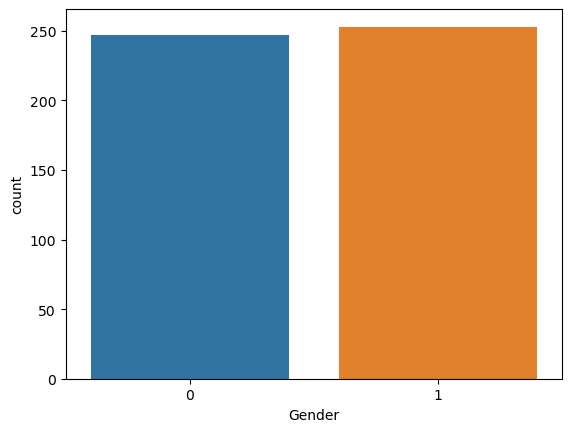

In [17]:
sns.countplot(x=df['Gender'])


In [18]:
df['Gender'].value_counts()


1    253
0    247
Name: Gender, dtype: int64

In [19]:
df['Age'].value_counts()


41.851720    1
44.232556    1
40.752195    1
38.105948    1
39.120318    1
            ..
47.659486    1
57.284824    1
55.989615    1
34.164092    1
46.731152    1
Name: Age, Length: 500, dtype: int64

# Data cleaning

## Data normalization


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.values.reshape(-1,1))


In [25]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [26]:
Y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

## Splitting Data into test and training

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)

# Applying Models

## Decision Tree

In [29]:
def normalize_features(X):
    return preprocessing.normalize(X, axis=0)

def export_as_graph(clf, f_names):
    dot_data = tree.export_graphviz(clf, 
                         out_file=None, 
                      feature_names=f_names,                  
                      filled=True, rounded=True,  
                     special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

def create_decision_tree(X_train, Y_train_encoded, feature_names, random_state=0, max_depth=2):
    clf = generate_decision_tree_model(random_state, max_depth, X_train, Y_train_encoded)
    graph = export_as_graph(clf, feature_names)
    return graph, clf

def generate_decision_tree_model(random_state, max_depth, X_train, Y_train_encoded):
    clf = tree.DecisionTreeClassifier(random_state=random_state, max_depth=max_depth)
    clf = clf.fit(X_train, Y_train_encoded)
    return clf

def encode_labels(Y, lab_enc):
    Y_encoded = lab_enc.fit_transform(Y)
    return Y_encoded

def run_predictions_and_compute_error(model, X_test, Y_test_encoded):
    Y_prediction = model.predict(X_test)
    return mean_squared_error(Y_test_encoded, Y_prediction, squared=False), Y_prediction

In [44]:
def compute_metrics(X, y_test, y_predict):
    k = X.shape[1]
    n = len(X)
    RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
    MSE = mean_squared_error(y_test, y_predict)
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
    MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100
    print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)
    return [RMSE, MSE, MAE, r2, adj_r2, MAPE]

In [38]:
# Decision tree model expects categorical data
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()

Y_train_encode = encode_labels(Y_train, label_enc)
Y_test_encode = encode_labels(Y_test, label_enc)

In [39]:
Y_train_encode

array([191, 132,  49,  50, 139, 316, 273,  83, 254, 129,   0, 321, 152,
       363, 216, 171,  85, 210, 348, 186,  58, 201, 263, 365, 315, 250,
       347, 158, 137, 207, 176, 184,  74, 178, 369, 350, 324,  19, 285,
        81, 373,  39, 353, 277, 261,  47, 258, 264,  48,  32, 195,  41,
       230, 143,  31, 203,  99, 133, 279, 211, 127,   7, 352,  36, 162,
        33, 104,  16, 301, 209, 218, 327,  44, 122, 286, 308, 243, 113,
       105, 307, 205, 231, 257, 306,   1, 234,  63, 200, 214, 150,   9,
       199, 227,  61, 323, 344, 172,   4, 289,  20, 240, 343, 149, 342,
       119, 288, 317, 269, 226, 271, 160,  17, 366,  13, 101, 246,  57,
       180, 336, 232, 374, 170, 349, 281, 355, 115, 179, 351, 181, 260,
       140, 296, 247, 112, 267,  80, 333, 215, 253,  96, 190, 141,  79,
       217, 303,  21, 294,  46, 223,  27, 275, 124,  38,  67, 155, 358,
       123, 361,  29,  12, 136, 111, 145, 197,  84, 182, 213,  76, 125,
       278, 173, 272, 305, 372, 169, 276, 359, 311,  88,  22,  5

In [40]:
dt_model = generate_decision_tree_model(random_state=0, max_depth=4, X_train=X_train, Y_train_encoded=Y_train_encode)

In [41]:
err, Y_dt_predictions = run_predictions_and_compute_error(dt_model, X_test, Y_test_encode)

In [42]:
err

71.44413201936182

In [46]:
print("-------Training set-------- ")
compute_metrics(X_train, Y_train_encode, dt_model.predict(X_train))

print("--------Test set-----------")
compute_metrics(X_test, Y_test_encode, Y_dt_predictions)

-------Training set-------- 
RMSE =  215.826 
MSE = 46581.01066666667 
MAE = 186.29066666666668 
R2 = -2.974941176470588 
Adjusted R2 = -3.02880216802168 
MAPE = nan
--------Test set-----------
RMSE =  71.444 
MSE = 5104.264 
MAE = 61.624 
R2 = -2.920325652841782 
Adjusted R2 = -3.0850452180872354 
MAPE = nan


[71.444, 5104.264, 61.624, -2.920325652841782, -3.0850452180872354, nan]

In [48]:
X_Testing = np.array([[1, 50, 50000, 10985, 629312]])

Y_prediction = dt_model.predict(X_Testing)

In [57]:
print(Y_prediction)
Y_prediction_to_number = label_enc.inverse_transform(Y_prediction)
print(Y_prediction_to_number)
Y_prediction_value = scaler.inverse_transform(Y_prediction_to_number.reshape(1, -1))
print(Y_prediction_value[:,0])

[0]
[0.12090943]
[0.20526731]


## Linear Regression

In [58]:
lr_model = LinearRegression(fit_intercept = True)
lr_model.fit(X_train, Y_train)

LinearRegression()

In [59]:
print('Linear Model Coeff (m)', lr_model.coef_)
print('Linear Model Coeff (b)', lr_model.intercept_)

Linear Model Coeff (m) [[-1.30482813e-06  5.92653468e-01  6.33614295e-01 -7.50758919e-06
   4.00052221e-01]]
Linear Model Coeff (b) [-0.31675504]


In [60]:
Y_lr_train_pred = lr_model.predict(X_train)
Y_lr_pred = lr_model.predict(X_test)

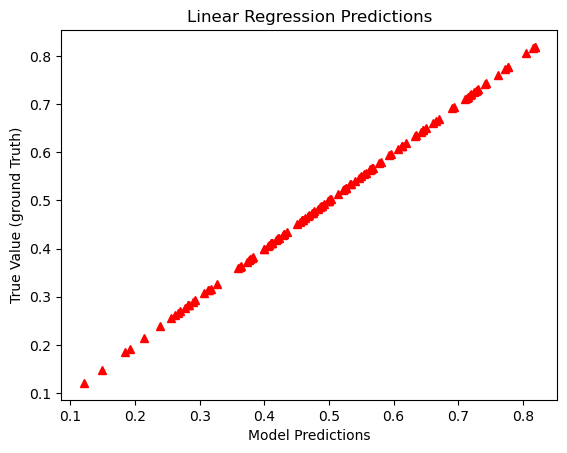

In [64]:
Y_predict = lr_model.predict(X_test)


plt.plot(Y_test, Y_lr_pred, "^", color = 'r')
# plt.xlim(0, 3000)
# plt.ylim(0, 3000)
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

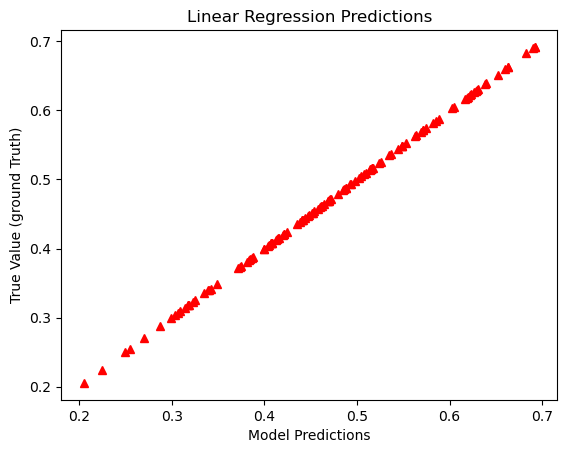

In [66]:
Y_lr_predict = scaler.inverse_transform(Y_predict)
Y_test_inv = scaler.inverse_transform(Y_test)
plt.plot(Y_test_inv, Y_lr_predict, "^", color = 'r')
# plt.xlim(0, 3000)
# plt.ylim(0, 3000)
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [67]:
print("-------Training set-------- ")
compute_metrics(X_train, Y_train, Y_lr_train_pred)

print("--------Test set-----------")
compute_metrics(X_test, Y_test, Y_lr_pred)

-------Training set-------- 
RMSE =  0.0 
MSE = 4.465771995199281e-10 
MAE = 1.6755844148299264e-05 
R2 = 0.999999979744024 
Adjusted R2 = 0.9999999794695528 
MAPE = inf
--------Test set-----------
RMSE =  0.0 
MSE = 3.9297816610496665e-10 
MAE = 1.575414315205581e-05 
R2 = 0.9999999847014833 
Adjusted R2 = 0.9999999840586885 
MAPE = 0.0035863599065890737


[0.0,
 3.9297816610496665e-10,
 1.575414315205581e-05,
 0.9999999847014833,
 0.9999999840586885,
 0.0035863599065890737]

It seems the model works pretty well with linear regression

## Artificial Neural network

In [69]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [72]:
selected_features = list(X.keys())
print(selected_features)

['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']


In [73]:
ann_model = Sequential()
ann_model.add(Dense(100, input_dim = len(selected_features), activation = 'relu'))
ann_model.add(Dense(100, activation='relu'))
# ann_model.add(Dense(100, activation='relu'))
ann_model.add(Dense(1, activation = 'linear'))

In [74]:
ann_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [75]:
ann_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')


In [77]:
epochs_hist = ann_model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 0.1726 - val_loss: 0.0421
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0217 - val_loss: 0.0286
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0309 - val_loss: 0.0327
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.0110
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0099 - val_loss: 0.0119
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0071 - val_loss: 0.0080
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.0065
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 11/100
6/6 [=========

Epoch 80/100
6/6 [==============================] - 0s 5ms/step - loss: 1.5426e-05 - val_loss: 6.5423e-05
Epoch 81/100
6/6 [==============================] - 0s 5ms/step - loss: 1.5193e-05 - val_loss: 6.3666e-05
Epoch 82/100
6/6 [==============================] - 0s 6ms/step - loss: 1.4270e-05 - val_loss: 6.2559e-05
Epoch 83/100
6/6 [==============================] - 0s 5ms/step - loss: 1.5100e-05 - val_loss: 6.1498e-05
Epoch 84/100
6/6 [==============================] - 0s 5ms/step - loss: 1.4090e-05 - val_loss: 6.1552e-05
Epoch 85/100
6/6 [==============================] - 0s 5ms/step - loss: 1.3817e-05 - val_loss: 6.0550e-05
Epoch 86/100
6/6 [==============================] - 0s 5ms/step - loss: 1.3608e-05 - val_loss: 6.1484e-05
Epoch 87/100
6/6 [==============================] - 0s 6ms/step - loss: 1.4176e-05 - val_loss: 5.9938e-05
Epoch 88/100
6/6 [==============================] - 0s 5ms/step - loss: 1.3877e-05 - val_loss: 5.9764e-05
Epoch 89/100
6/6 [============================

In [78]:
epochs_hist.history.keys()


dict_keys(['loss', 'val_loss'])

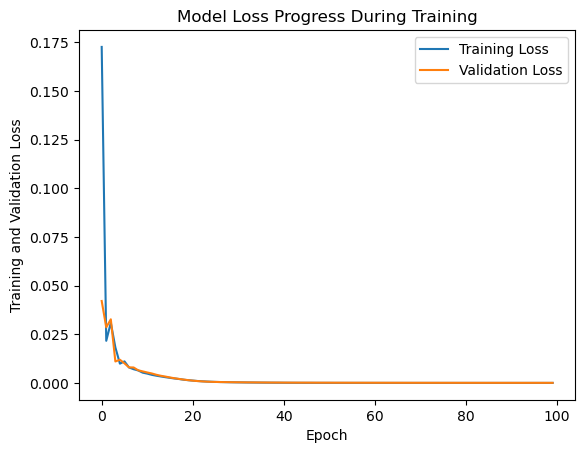

In [79]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

4/4 [==============================] - 0s 3ms/step


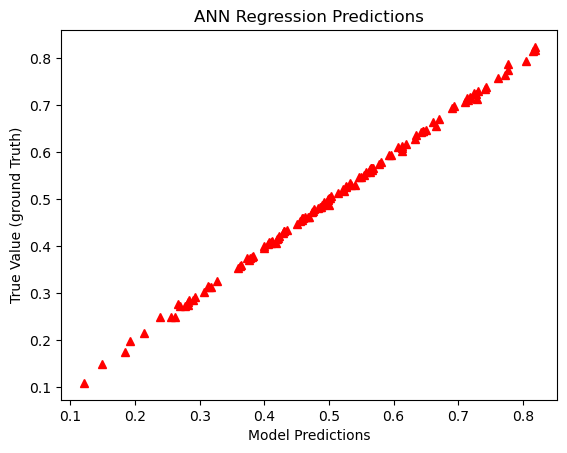

In [81]:
Y_predict = ann_model.predict(X_test)


plt.plot(Y_test, Y_predict, "^", color = 'r')
# plt.xlim(0, 3000)
# plt.ylim(0, 3000)
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('ANN Regression Predictions')
plt.show()

In [82]:
Y_ann_test_predict = ann_model.predict(X_test)
Y_ann_train_predict = ann_model.predict(X_train)

print("-------Training set-------- ")
compute_metrics(X_train, Y_train, Y_ann_train_predict)

print("--------Test set-----------")
compute_metrics(X_test, Y_test, Y_ann_test_predict)

12/12 [==============================] - 0s 2ms/step
-------Training set-------- 
RMSE =  0.004 
MSE = 1.989546602232745e-05 
MAE = 0.0028505352300179313 
R2 = 0.9990975757757742 
Adjusted R2 = 0.9990853478052563 
MAPE = inf
--------Test set-----------
RMSE =  0.005 
MSE = 2.2203979052726502e-05 
MAE = 0.0034283548420353136 
R2 = 0.9991356060663925 
Adjusted R2 = 0.9990992869935519 
MAPE = 0.8604997211744368


[0.005,
 2.2203979052726502e-05,
 0.0034283548420353136,
 0.9991356060663925,
 0.9990992869935519,
 0.8604997211744368]